Programa escrito para testar as funções de cálculo de volume de ar nos pulmões, para ser usado como volume de referência no cálculo de potencial de recrutamento alveolar.

Testado com MRA_29.

Segmentação completa (incluindo colapso) não funciona com CTs volumétricas, pela dificuldade de separar diagrafma e coração do colapso (valores HU próximos).

In [1]:
import ctFuncs as ctf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%load_ext autoreload
%autoreload 2

# Lendo imagens

In [3]:
pasta = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrut_pos/Vol_Recru_Pos_50_mm_10'    # CT volumetrica

In [4]:
imagens = ctf.lePastaDICOM(pasta)

Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)


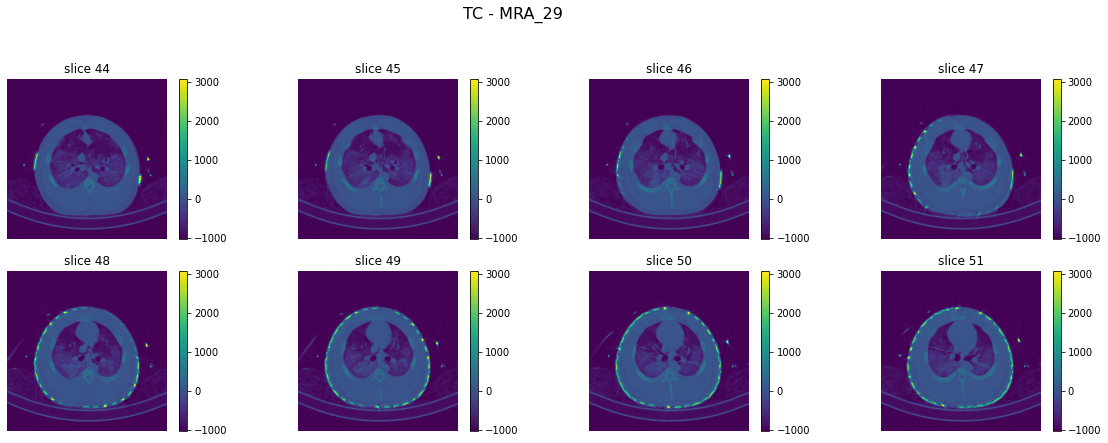

In [5]:
fig = ctf.mostraCortesDICOM(imagens,44,8,colorbar=True)
_= fig.suptitle('TC - MRA_29', fontsize=16)

# Segmentando pulmão

In [6]:
### Exemplo de código segmentando pulmão aerado:
# df = ctf.SegmentaPulmaoAerado(imagens)              # segmenta pulmao aerado
# _= ctf.mostraCortes(df.imagem.values,0,4)           # mostra imagens de ct completas
# _= ctf.mostraCortes(df.mascara_aerado.values,0,4)   # mostra mascaras do pulmao aerado
# plt.imshow(df.imagem.values[0])                     # mostra apenas um corte

In [7]:
df = ctf.SegmentaPulmaoCompleto(imagens, threshold=50)  # threshold para pulmão totalmente recrutado

Tamanho: 512 512 89


In [8]:
df.head(3)

,imagem,mascara_ar,imagem_ar,pulmao,imagem_pulmao
0,"[[-1003, -991, -1000, -1006, -992, -999, -1015...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[-1015, -1000, -998, -1003, -1002, -995, -999...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[-987, -994, -1009, -1012, -1004, -1006, -100...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [9]:
## PARA INVESTIGAR...
#import SimpleITK as sitk
#img_aux = imagens[:,:,1]
#img_aux = sitk.GetImageFromArray(sitk.GetArrayFromImage(img_aux)) # sem isso não funciona!!!
#mask_pulmao_completo = ctf.SegmentaPulmaoCompletoImg(img_aux, threshold=50) # threshold para pulmão totalmente recrutado
#plt.imshow(ctf.I2A(mask_pulmao_completo))

#temp2 = ctf.I2A(imagens)
#print(f'Cuidado! Índices invertidos: {temp2[88][214,245]} = {imagens[245,214,88]}')

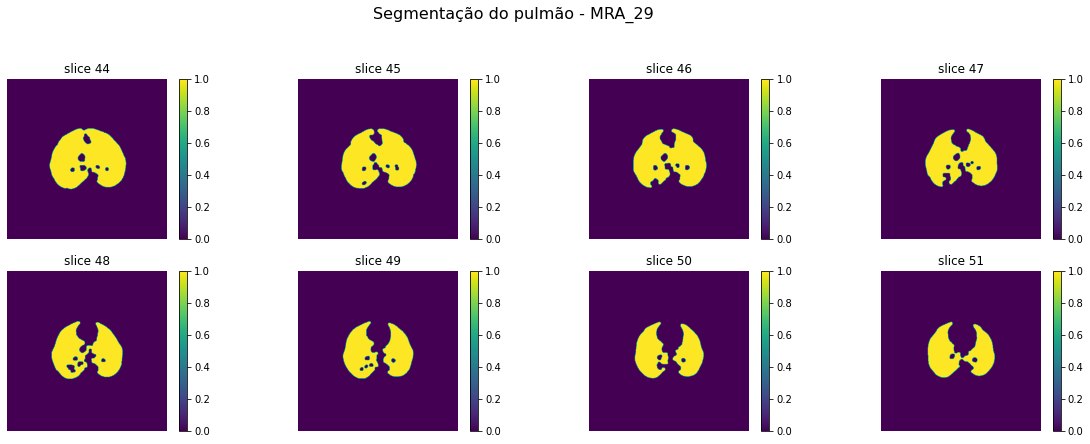

In [10]:
fig = ctf.mostraCortes(df.pulmao.values,44,8,colorbar=True)
_= fig.suptitle('Segmentação do pulmão - MRA_29', fontsize=16)

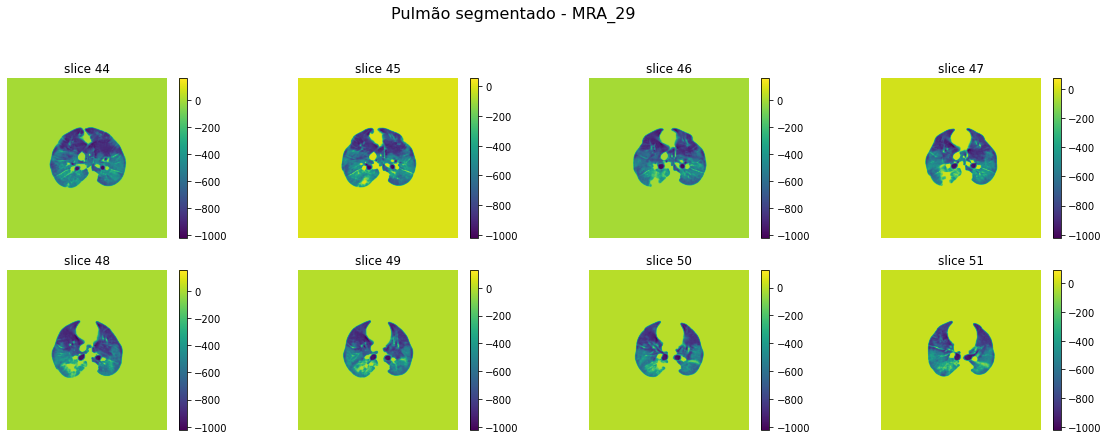

In [11]:
fig = ctf.mostraCortes(df.imagem_pulmao.values,44,8,colorbar=True)
_= fig.suptitle('Pulmão segmentado - MRA_29', fontsize=16)

# Calculando volume de ar

In [12]:
v_voxel_mL = np.prod(imagens.GetSpacing())/1000
volume_ar = ctf.calcula_volume_ar(df.imagem_pulmao.values,v_voxel_mL)
print(f'{volume_ar} mL')

1678.5440254211426 mL


# Verificando funções quando existe colapso

## MRA29 D1

Size: (512, 512, 86); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 86
500.71549525260934 mL


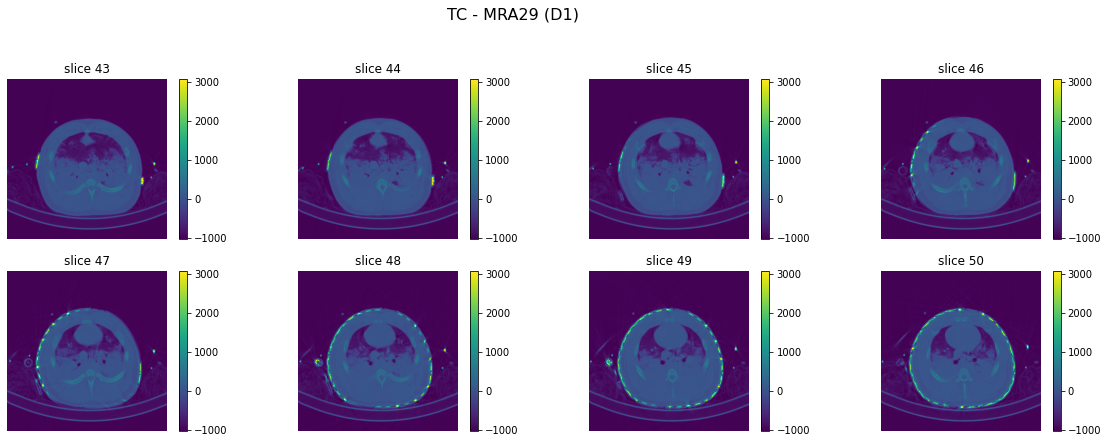

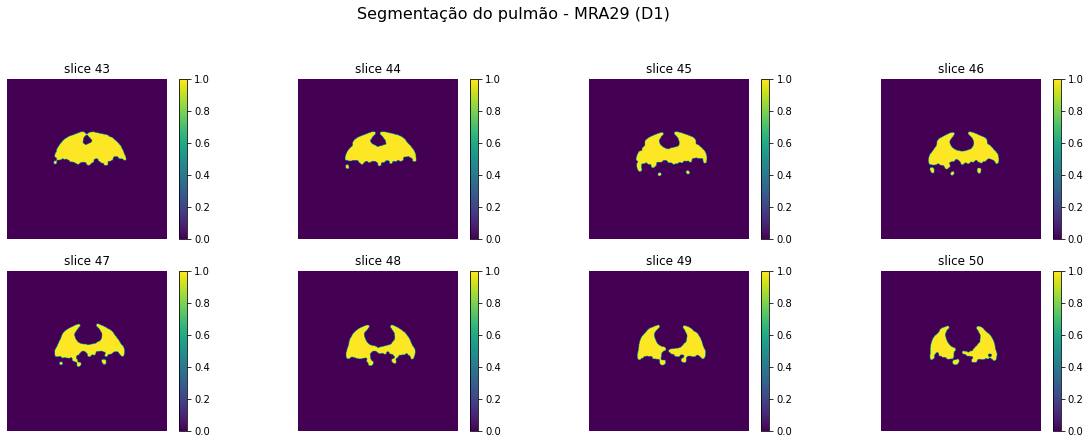

In [13]:
pasta_D1 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/D/Vol_Int_D1_10_50_mm_2'    # CT volumetrica
volume_ar_D1,imagens_D1,df_D1 = ctf.calcula_volume_pasta(pasta_D1, animal='MRA29 (D1)', mostraImagens = True)

## D5

In [14]:
pasta_D5 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/D/Vol_Int_D5_30_50_mm_6'    # CT volumetrica

In [15]:
_ = ctf.calcula_volume_pasta(pasta_D5, animal='MRA29 (D5)')

Size: (512, 512, 86); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 86
1305.5184970855717 mL


## B1

In [16]:
pasta_B1 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/B/Vol_B1_10_50_mm_2'    # CT volumetrica
_ = ctf.calcula_volume_pasta(pasta_B1, animal='MRA29 (B1)')

Size: (512, 512, 88); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 88
531.2288735389709 mL


# Outros testes

Teste de segmentação completa do pulmão, incluindo parte colapsada.
Aparentemente não funciona com CT volumétrica, pela dificuldade de separar coração e diafragma da parte colapsada (valores HU similares).

Size: (512, 512, 86); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 86
500.71549525260934 mL


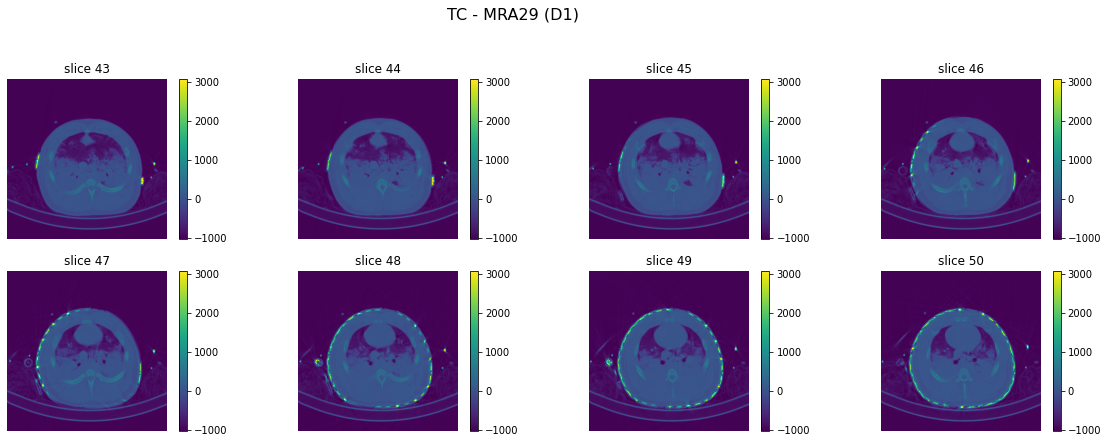

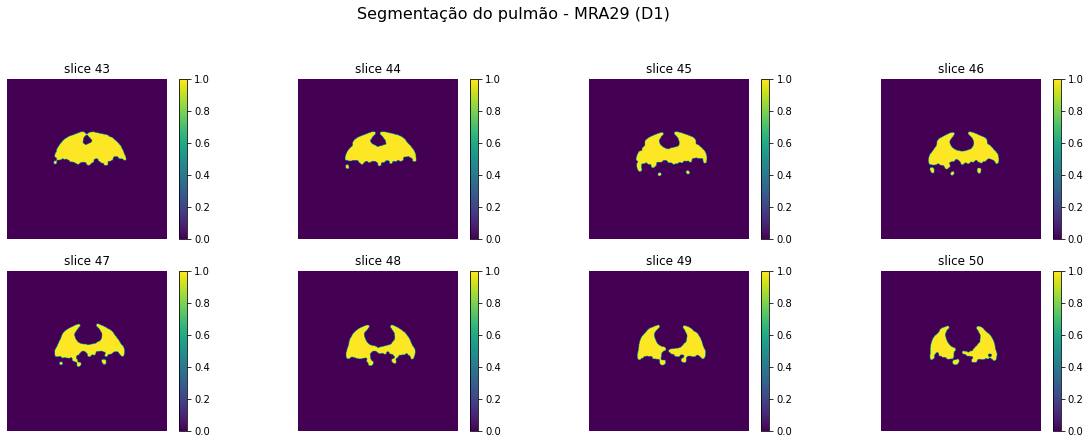

In [17]:
pasta_D1 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/D/Vol_Int_D1_10_50_mm_2'    # CT volumetrica
volume_ar_D1,imagens_D1,df_D1 = ctf.calcula_volume_pasta(pasta_D1, animal='MRA29 (D1)', mostraImagens = True)

In [18]:
# FUNÇÃO NÃO FINALIZADA...
#_= ctf.SegmentaPulmaoCompleto3D(imagens_D1)

<br/><br/><br/><br/><br/><br/>
# Ajuste da exponencial nos volumes recrutados

## MRA29 pós recrutamento (PEEP 24cmH2O)

In [19]:
pasta = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrut_pos/Vol_Recru_Pos_50_mm_10'    # CT volumetrica
volume_ar_MRA29_RP,imagens_MRA29_RP,df_MRA29_RP = ctf.calcula_volume_pasta(pasta, animal='MRA29 (pós recrutamento - PEEP 24 cmH2O)')

Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 89
1678.5440254211426 mL


## MRA29 durante recrutamento fase 3 (PEEP 45cmH2O)

In [20]:
pasta = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrut_pos/Vol_Recru_3_50_mm_8'    # CT volumetrica
volume_ar_MRA29_R3,imagens_MRA29_R3,df_MRA29_R3 = ctf.calcula_volume_pasta(pasta, animal='MRA29 (durante recrutamento - PEEP 40 cmH2O)')

Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 89
2055.0341540813447 mL


# Todos

## MRA26

Size: (512, 512, 87); Spacing: (0.765625, 0.765625, 5.0)
Tamanho: 512 512 87
1373.4339242285157 mL
Size: (512, 512, 87); Spacing: (0.765625, 0.765625, 5.0)
Tamanho: 512 512 87
1969.8752383276367 mL
K = 0.030899094057260833; Vmax = 2622.866589297819


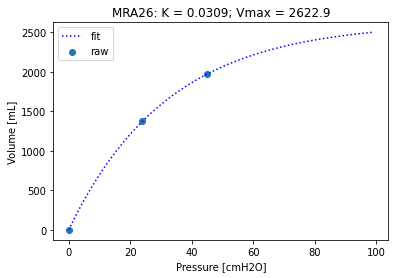

In [21]:
pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_26/Recrut_pos/RECRUT_3_5_0_MM_0005'    # CTvol 1969 mL
pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_26/Recrut_pos/POS_RECRUT3_5_0_MM_0006'    # CTvol 1373 mL
_= ctf.ajusta_exponencial_recrutamento(pasta_pos, pasta_R3, 'MRA26')

## MRA28

Size: (512, 512, 90); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 90
1384.9271159648897 mL
Size: (512, 512, 90); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 90
1823.6774616718296 mL
K = 0.044662472791196964; Vmax = 2105.897076663757


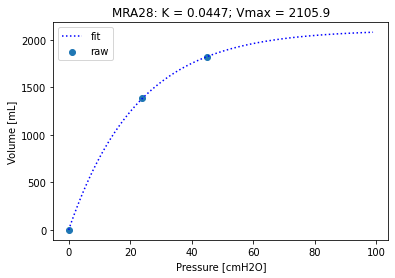

Size: (512, 512, 90); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 90
1384.9271159648897 mL
Size: (512, 512, 90); Spacing: (0.68359375, 0.68359375, 5.000000000000001)
Tamanho: 512 512 90
1823.6774616718296 mL
K = 0.024741485732447086; Vmax = 3092.923973984445


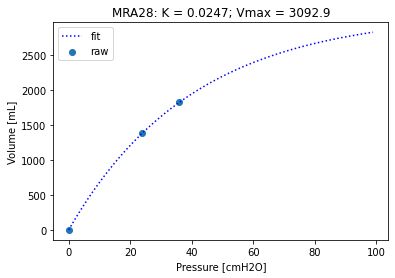

In [22]:
#pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_1_50_mm_4'    # CTvol 1210 mL
#pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_2_50_mm_6'    # CTvol 1314 mL
#pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_3_2_mm_10'    # CTvol 1385 mL
pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_3_50_mm_8'     # CTvol 1384 mL

pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_36_50_mm_9'    # CTvol 1823 mL
#pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_Pos_2_mm_13'    # CTvol 1437 mL
#pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_28/Recrut_pos/Vol_Recru_Pos_50_mm_11'    # CTvol 1436 mL

#_= ctf.ajusta_exponencial_recrutamento(pasta_pos, pasta_R3, 'MRA28')
_= ctf.ajusta_exponencial_recrutamento(pasta_R3, pasta_pos, 'MRA28')
_= ctf.ajusta_exponencial_recrutamento(pasta_R3, pasta_pos, 'MRA28', pressoes = [0, 24, 36])

## MRA29

Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 89
1678.5440254211426 mL
Size: (512, 512, 89); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 89
2055.0341540813447 mL
K = 0.05963694133068645; Vmax = 2205.711869226343


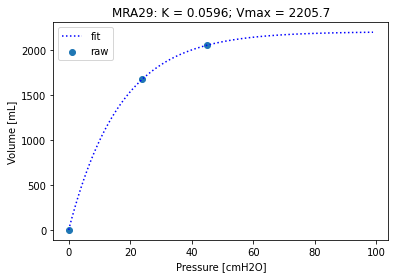

In [23]:
pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrut_pos/Vol_Recru_3_50_mm_8'    # CTvol 2055 mL
pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_29/Recrut_pos/Vol_Recru_Pos_50_mm_10'    # CTvol 1678 mL
_= ctf.ajusta_exponencial_recrutamento(pasta_pos, pasta_R3, 'MRA29')

## MRA31

Size: (512, 512, 76); Spacing: (0.65625, 0.65625, 5.0)
Tamanho: 512 512 76
1527.71957296875 mL
Size: (512, 512, 76); Spacing: (0.65625, 0.65625, 5.0)
Tamanho: 512 512 76
1852.7079208886719 mL
K = 0.06192490498562224; Vmax = 1974.3877060910486


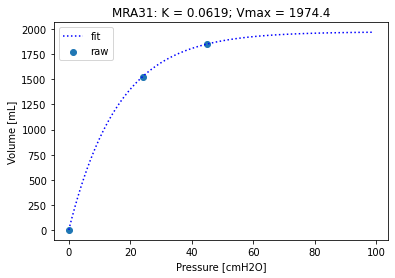

In [24]:
pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_31/Recrut_pos/Vol_Recru_3_50_mm_7'       # CTvol 1527 mL
pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_31/Recrut_pos/Vol_Recru_Pos_50_mm_8'    # CTvol 1852 mL
_= ctf.ajusta_exponencial_recrutamento(pasta_pos, pasta_R3, 'MRA31')

## MRA32

Size: (512, 512, 84); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 84
981.0712067604064 mL
Size: (512, 512, 84); Spacing: (0.68359375, 0.68359375, 5.0)
Tamanho: 512 512 84
1271.3319202423095 mL
K = 0.047635948526718166; Vmax = 1440.162083889477


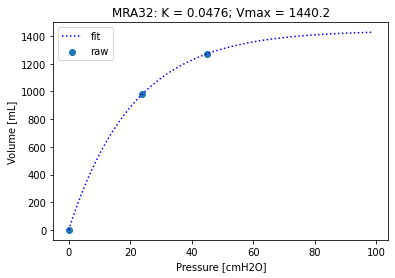

In [25]:
#pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_32/Recrut_pos/Vol_Recru_1_50_mm_3'       # CTvol 725 mL
#pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_32/Recrut_pos/Vol_Recru_2_50_mm_4'       # CTvol 780 mL
#pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_32/Recrut_pos/Vol_Recru_3_50_mm_5'       # CTvol 860 mL
pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_32/Recrut_pos/Vol_Recru_3_50_mm_10'       # CTvol 1271 mL

pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_32/Recrut_pos/Vol_Recru_Pos_50_mm_11'    # CTvol 981 mL
_= ctf.ajusta_exponencial_recrutamento(pasta_pos, pasta_R3, 'MRA32')

## MRA33

Size: (512, 512, 84); Spacing: (0.796875, 0.796875, 5.0)
Tamanho: 512 512 84
1684.4333432958988 mL
Size: (512, 512, 84); Spacing: (0.796875, 0.796875, 5.0)
Tamanho: 512 512 84
2030.4792702575683 mL
K = 0.0634304706003319; Vmax = 2154.5650333633625


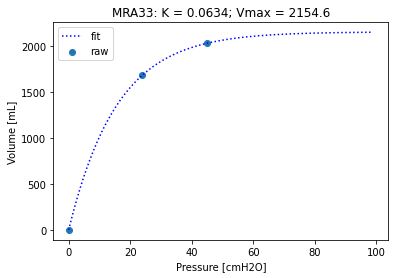

In [26]:
pasta_R3 = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_33/Recrut_pos/Vol_Recru_3_50_mm_8'       # CTvol 2030 mL
pasta_pos = '/mnt/hdsda3/arquivos/Recrutamento/CT_data_organizado/MRA_33/Recrut_pos/Vol_Recru_Pos_50_mm_10'    # CTvol 1684 mL
_= ctf.ajusta_exponencial_recrutamento(pasta_pos, pasta_R3, 'MRA33')

## MRA34

In [27]:
# valores não disponíveis...